# Lecture 8 - Machine Learning (2) - Classification

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split

%matplotlib inline

## Classification

* Classification is a supervised learning approach in which the machine learns from the data input given to it and then uses this learning to classify new observation (https://en.wikipedia.org/wiki/Statistical_classification).
* In this lecture, we will classify wine qualities.

In [4]:
df_wine = pd.read_csv('./wine_quality.csv')

In [6]:
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,average
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,average
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,average
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,average
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,average


In [8]:
df_wine['quality'].value_counts()

quality
average    1319
good        217
bad          63
Name: count, dtype: int64

### (1) k-nearest neighbors algorithm

* The k-nearest neighbors algorithm (k-NN) is a non-parametric method used for classification and regression.
* Given an object to be assigned to a class in a feature space, select the class that is "nearest" to the negihbors in the training set. This 'nearness" is a distance metric, which is usually a Euclidean distance.
* You can also check out further materials to learn.
    * https://ocw.mit.edu/courses/sloan-school-of-management/15-097-prediction-machine-learning-and-statistics-spring-2012/lecture-notes/MIT15_097S12_lec06.pdf
    * https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761
    * https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm

In [10]:
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,average
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,average
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,average
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,average
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,average


In [12]:
x = df_wine.drop(['quality'], axis=1)
y = df_wine['quality']

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)

* Import the kNeighbors Classifiers

In [16]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)

* Fit the data and run a prediction.

In [18]:
knn.fit(x_train, y_train)
pred_knn  = knn.predict(x_test)

In [22]:
y_test

75      average
1283    average
408     average
1281    average
1118    average
         ...   
1416    average
1567    average
1204       good
12      average
584        good
Name: quality, Length: 400, dtype: object

In [20]:
pred_knn

array(['average', 'average', 'good', 'average', 'average', 'average',
       'average', 'average', 'good', 'average', 'average', 'average',
       'average', 'average', 'average', 'average', 'average', 'average',
       'average', 'average', 'average', 'average', 'average', 'average',
       'average', 'average', 'average', 'average', 'average', 'average',
       'average', 'good', 'average', 'average', 'average', 'average',
       'average', 'average', 'average', 'average', 'average', 'average',
       'average', 'average', 'average', 'average', 'average', 'average',
       'average', 'average', 'average', 'average', 'average', 'average',
       'average', 'good', 'good', 'average', 'average', 'average',
       'average', 'average', 'average', 'average', 'average', 'average',
       'average', 'average', 'average', 'good', 'average', 'average',
       'average', 'good', 'good', 'average', 'average', 'average',
       'average', 'average', 'average', 'average', 'average', 'average',
  

* How about the accuracy?

In [24]:
from sklearn import metrics

metrics.accuracy_score(y_test,pred_knn)

0.8325

* Let's see what happens when we change that value to k=1.

In [26]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(x_train, y_train)
pred_knn  = knn.predict(x_test)
metrics.accuracy_score(y_test,pred_knn)

0.8075

* How about we use a loop algorithm through various k values and find the optimal value?

In [34]:
k_range = range(1, 20)
accuracy = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    pred_knn = knn.predict(x_test)
    accuracy.append(metrics.accuracy_score(y_test, pred_knn))

In [36]:
accuracy

[0.8075,
 0.855,
 0.8525,
 0.8575,
 0.8325,
 0.835,
 0.835,
 0.8425,
 0.8425,
 0.855,
 0.8475,
 0.8525,
 0.85,
 0.855,
 0.85,
 0.85,
 0.8525,
 0.8525,
 0.85]

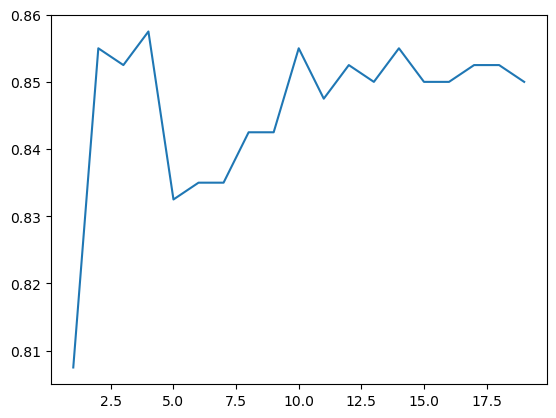

In [38]:
plt.plot(k_range, accuracy)
plt.show()

### (2) Support Vector Machine (SVM)

* Support Vector Machines (SVM) are a method that uses points in a transformed problem space that best separate classes into two groups.
* You can also check out further materials to learn.
    * https://towardsdatascience.com/support-vector-machine-introduction-to-machine-learning-algorithms-934a444fca47

In [40]:
from sklearn.svm import SVC

svc = SVC(gamma='auto')
svc.fit(x_train, y_train)
pred_svc =svc.predict(x_test)

metrics.accuracy_score(y_test,pred_svc)

0.8575

### (3) Random Forest

* Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operate by constructing a multitude of decision trees.
* You can also check out further materials to learn.
    * https://en.wikipedia.org/wiki/Random_forest
    * https://web.csulb.edu/~tebert/teaching/lectures/551/random_forest.pdf

In [46]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
pred_rfc = rfc.predict(x_test)

metrics.accuracy_score(y_test, pred_rfc)

0.88